# Reading a file + libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import nltk
from tabulate import tabulate
from PIL import Image
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv("wines_SPA.csv")
df.head(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera Del Duero Red,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera Del Duero Red,5.0,3.0


## Just a picture

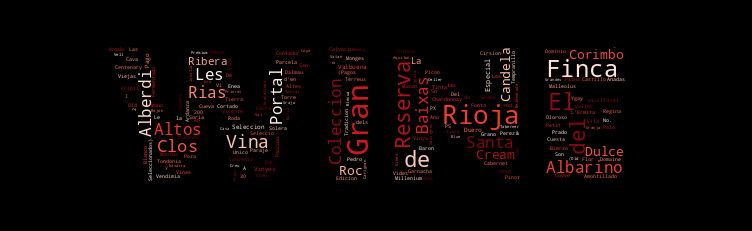

In [ ]:
text = df["wine"]
text = text.to_string()
tokens = text.split(" ")
word_counts = Counter(tokens)
fog_machine = WordCloud()
fog_machine.generate(text)
fog_machine.to_image()

fog_machine = WordCloud(width=800,
                        height=600,
                        min_font_size=14,
                        background_color="#333333",
                        colormap="spring")

fog_machine.generate_from_frequencies(word_counts)
fog_machine.to_image()
image = Image.open("Word_wine.png")
image
mask = np.array(image)

mask[0][0]
fog_machine = WordCloud(mask=mask,
                        max_words=7000,
                        colormap="Reds")
fog_machine.generate_from_frequencies(word_counts)
fog_machine.to_image()

# Descriptive statistics and data cleanup

#### Data Cleansing

In [4]:
df.shape

(7500, 11)

In [5]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [6]:
df.loc[df['year'] == "N.V."] = np.NaN
df=df.dropna()
df['year'] = df['year'].astype(np.int64)

In [7]:
df['year'].unique()

array([2013, 2018, 2009, 1999, 1996, 1998, 2010, 1995, 2015, 2011, 2016,
       1970, 1946, 1962, 2019, 2004, 1931, 1979, 2005, 2020, 2014, 1985,
       1929, 2007, 2012, 2017, 2008, 2006, 2000, 2003, 2002, 1991, 1994,
       1990, 1989, 1987, 1986, 1981, 2001, 1968, 1964, 1982, 1974, 1983,
       1955, 1980, 1972, 1953, 1958, 1942, 1965, 1992, 1973, 1997, 1967,
       1975, 1910, 1961, 1954, 1988, 1969, 1951, 1928, 1976, 1949, 2021,
       1959, 1922, 1978, 1925], dtype=int64)

In [8]:
df.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [9]:
df=df.drop("country",axis=1)
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58.0,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31.0,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793.0,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705.0,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309.0,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


#### Here I want to calculate mean, median and standard deviation

In [10]:
func = {
        "year": ["mean", "median", "std", "min", "max"],
        "rating": ["mean", "median", "std", "min", "max"],
        "num_reviews": ["mean", "median", "std", "min", "max"],
        "price": ["mean", "median", "std", "min", "max"],
        "body": ["mean", "median", "std", "min", "max"],
        "acidity": ["mean", "median", "std", "min", "max"],
      }
print(df.agg(func).round(2))

           year  rating  num_reviews    price  body  acidity
mean    2012.96    4.26       440.07    67.40  4.16     2.95
median  2015.00    4.20       402.00    31.63  4.00     3.00
std        7.15    0.13       605.07   165.51  0.59     0.24
min     1910.00    4.20        25.00     6.26  2.00     1.00
max     2021.00    4.90     16505.00  3119.08  5.00     3.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6070 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6070 non-null   object 
 1   wine         6070 non-null   object 
 2   year         6070 non-null   int64  
 3   rating       6070 non-null   float64
 4   num_reviews  6070 non-null   float64
 5   region       6070 non-null   object 
 6   price        6070 non-null   float64
 7   type         6070 non-null   object 
 8   body         6070 non-null   float64
 9   acidity      6070 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 521.6+ KB


#### Just picture

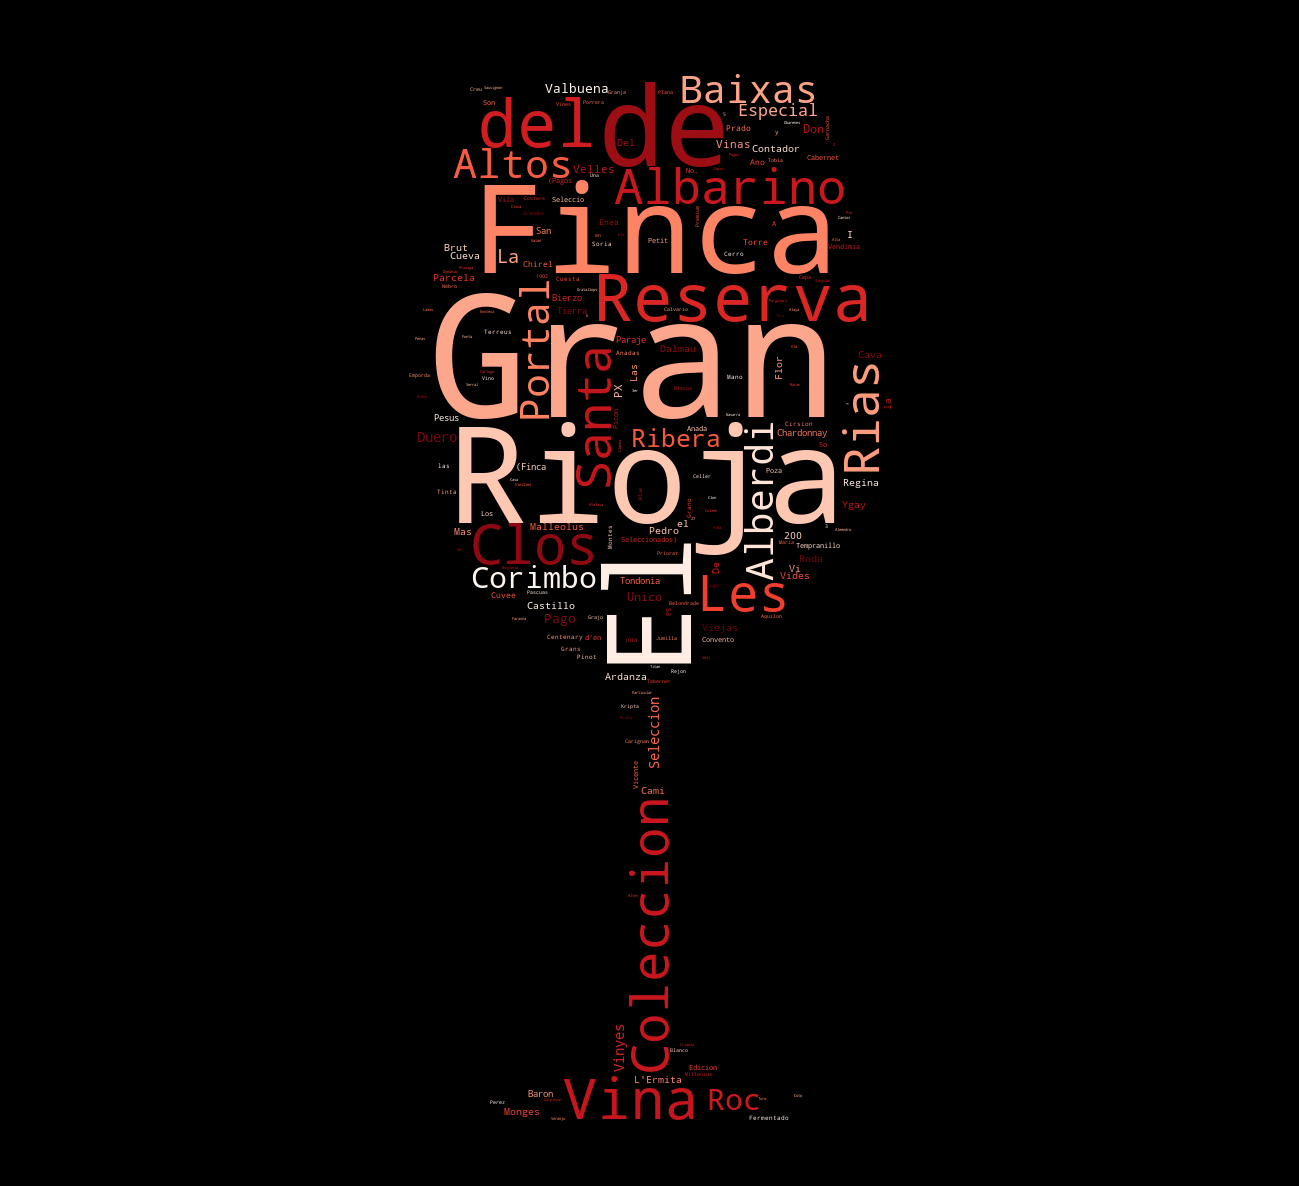

In [12]:
from collections import Counter  # Count the frequency of distinct strings
from wordcloud import WordCloud, ImageColorGenerator  # Generate wordclouds
from PIL import Image  # Load images from files
import numpy as np  # Convert images to numbers

text = df["wine"]
text = text.to_string()
tokens = text.split(" ")
word_counts = Counter(tokens)
fog_machine = WordCloud()
fog_machine.generate(text)
fog_machine.to_image()

fog_machine = WordCloud(width=800,
                        height=600,
                        min_font_size=14,
                        background_color="#333333",
                        colormap="spring")

fog_machine.generate_from_frequencies(word_counts)
fog_machine.to_image()
image = Image.open("wine.jpg")
image
mask = np.array(image)

mask[0][0]
fog_machine = WordCloud(mask=mask,
                        max_words=5000,
                        colormap="Reds")
fog_machine.generate_from_frequencies(word_counts)
fog_machine.to_image()

# Plots

1. First of all, I want to see the distribution of body among all wines

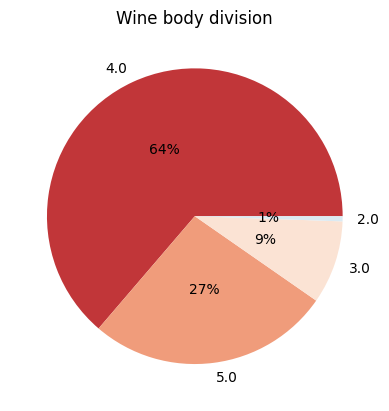

In [13]:
labels = df["body"].value_counts().index
colors = sns.color_palette("RdBu")
plt.pie(x=df["body"].value_counts().values, labels=labels, colors=colors, autopct="%0.0f%%", pctdistance=0.5)
plt.title("Wine body division")
plt.show()

One can see that most of the wines have body 4, and body 5 is in second place in terms of prevalence

2. Similar to the first step, I want to look at the acidity among the wines

C:\Users\irina\AppData\Local\Temp\ipykernel_24604\380037954.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["acidity"], palette="Reds_r")


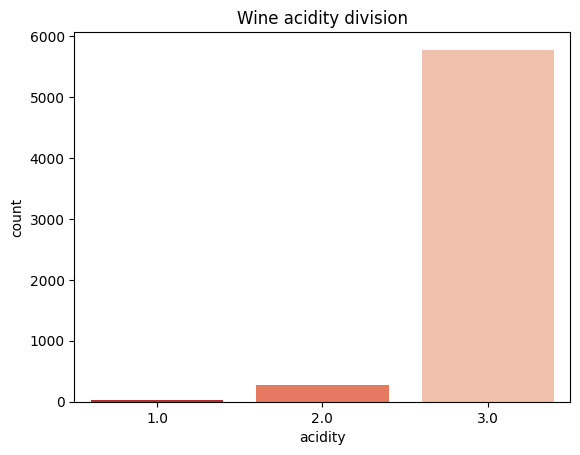

In [14]:
sns.countplot(x=df["acidity"], palette="Reds_r")
plt.title("Wine acidity division")
plt.show()

Now one can see that there are almost no wines with acidity 1, wines with acidity 2 less than 1000, but wines with acidity 3 are almost 6000

3. It's time to look at the top 15 wine production regions in the dataset

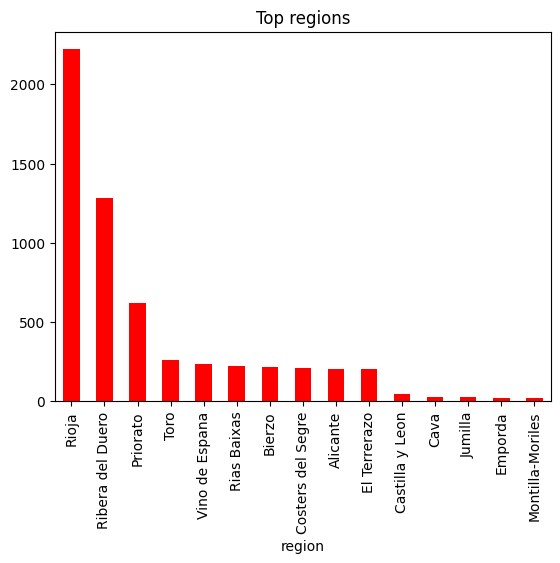

In [15]:
top = df["region"].value_counts().head(15)
top.plot.bar(color="Red")
plt.title("Top regions")
plt.show()

It can be seen from this graph that in the first place Rioja with more than 2000 wines

4. I want to see the number of wines with different ratings

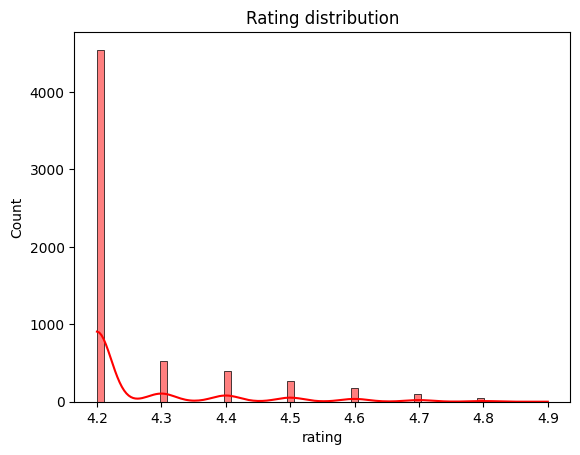

In [16]:
sns.histplot(data=df, x="rating", kde=True, color="Red")
plt.title("Rating distribution")
plt.show()

Now one can see that most of the wines with a rating of 4.2, there are more than 4000 of them. Wines with other rating values less than 1000

5. To find the dependencies among the indicators, let's build a heatmap

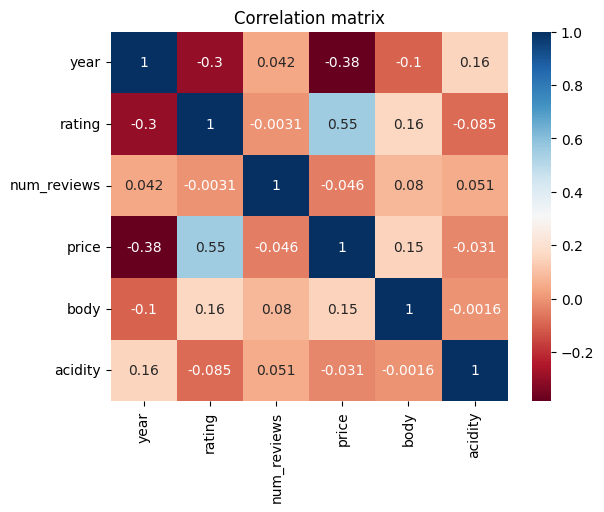

In [17]:
fig = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="RdBu")
plt.title("Correlation matrix")
plt.show()

From here it can be seen that there is only a correlation between the price and the rating

6. It's time to understand exactly how the price depends on the rating

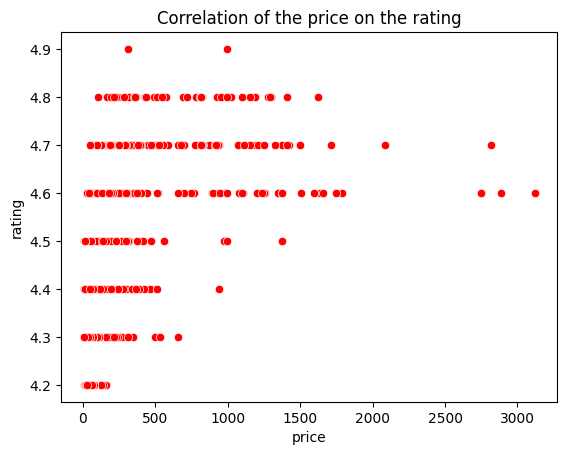

In [18]:
sns.scatterplot(df, x="price", y="rating", color="Red")
plt.title("Correlation of the price on the rating")
plt.show()

Although it is not very bright here, it is still clear that the higher the rating, the higher the initial price of the wine

7. I would like to look at the range of prices for each type of wine

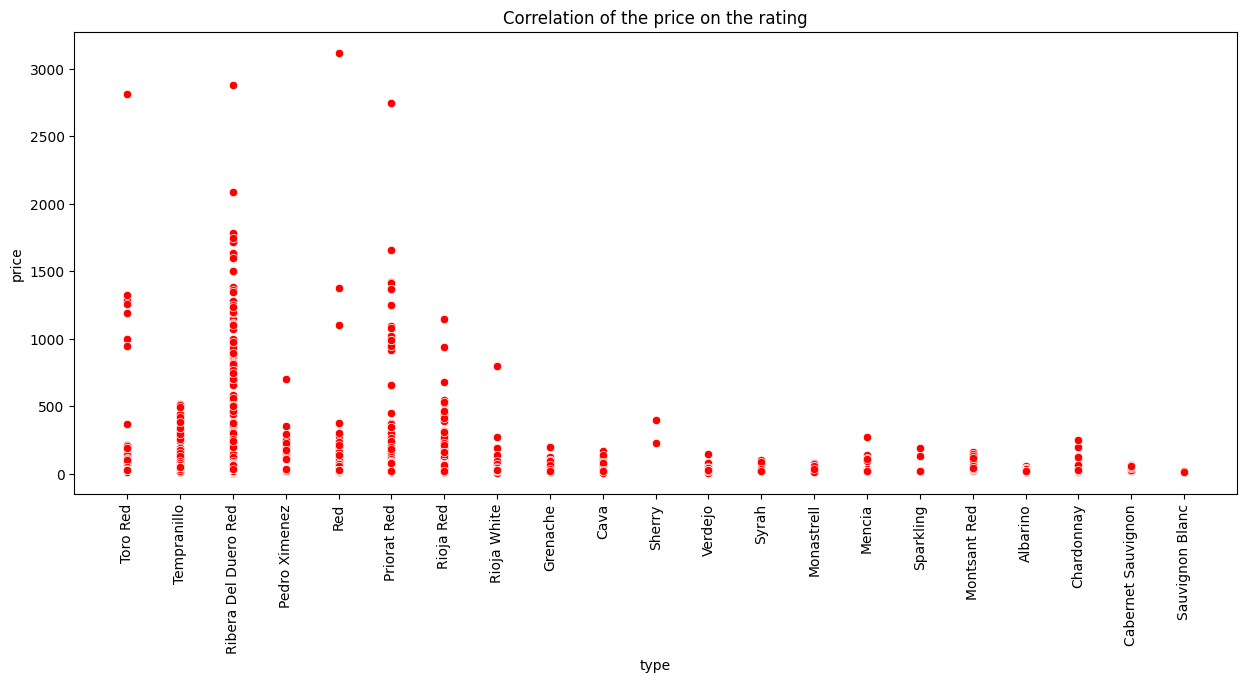

In [19]:
plt.figure(figsize=(15,6))
sns.scatterplot(data = df, y="price", x="type", color="Red")
plt.title("Correlation of the price on the rating")
plt.xticks(rotation=90)
plt.show()

8. Now I want to see correlations between rating, type, body and acidity of wine

In [20]:
fig = px.parallel_categories(df, dimensions=["rating", "type", "body", "acidity"],
                color="rating", color_continuous_scale=px.colors.sequential.RdBu,
                labels={"rating":"Rating", "type":"Wine type", "body":"Body", "acidity":"Acidity"})
fig.show()

9. I want to show how type and number reviews affect on price of wine
To do this, I will divide the graph into two parts, depending on the number of reviews. One of the parts will show data up to 700 reviews, and the second after 700

In [21]:
df1 = df[df["num_reviews"] < 700]
df2 = df[df["num_reviews"] > 700]

In [22]:
fig = px.scatter(df1, x="type", y="price", color="num_reviews", title='Wine Types Prices and Reviews', color_continuous_scale="RdBu")
fig.show()

In [23]:
fig = px.scatter(df2, x="type", y="price", color="num_reviews", title='Wine Types Prices and Reviews', color_continuous_scale="RdBu")
fig.show()

10. I want to show acidity and body of different types of wine

In [24]:
fig = px.scatter(df, x="type", y="body", color="acidity", title="Wine Types Body and Acidity", color_continuous_scale="bluered")
fig.show()

11. I want to check if region have influens on rating



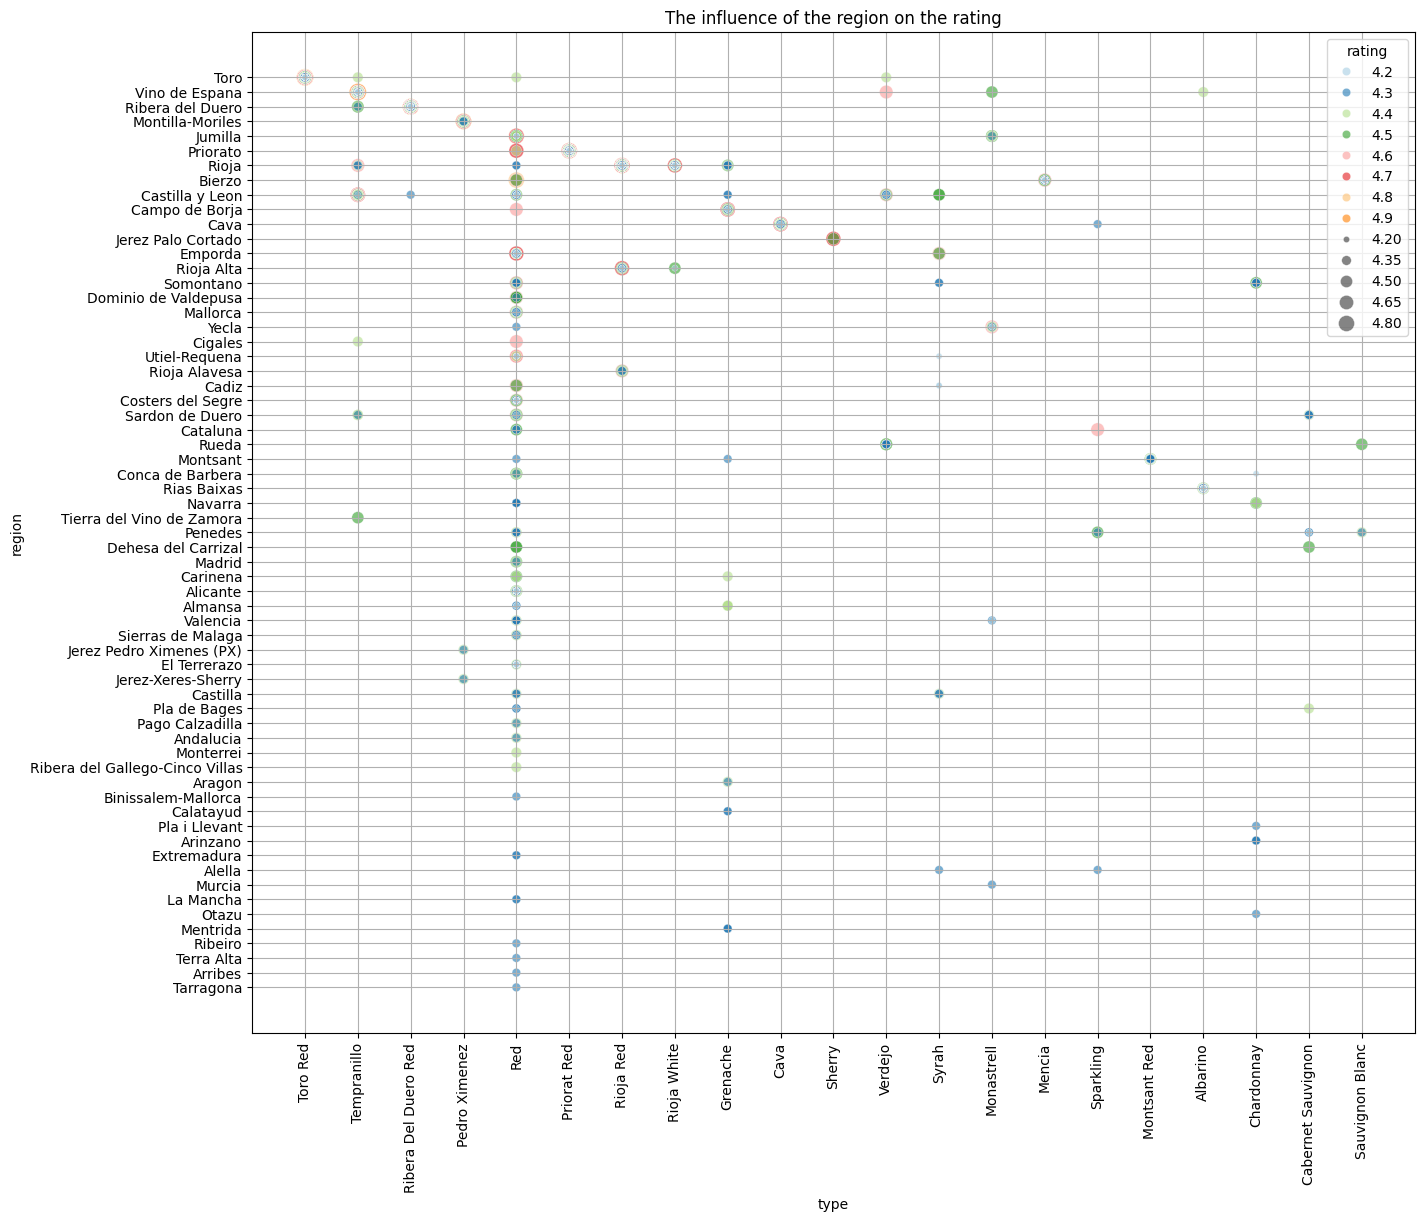

In [25]:
plt.figure(figsize=(15, 13))
sns.scatterplot(data = df, x="type", y="region", hue="rating", palette="Paired", size = 'rating', sizes = (20, 150), alpha = 0.6)
plt.grid(axis = 'y')
plt.grid(axis = 'x')
plt.xticks(rotation=90)
plt.title("The influence of the region on the rating")
plt.show()

It easily can be checked with Red wine. One may see that in different regions this wine has different ratings. In this graph I used "size" because in one wine type can have different ratings in one region

12. I want to do a graf that will show correlations between four parametres

In [26]:
fig = px.scatter_3d(df, x='year', y='body', z='rating',
              color='price', color_continuous_scale="RdBu")
fig.show()

It once again confirms the existence of a relationship between the rating and the price

13. I wanted to make an interactive graph that would show wineries by type of wine

In [27]:
top = df["type"].value_counts().head(5)
top

type
Rioja Red               2143
Ribera Del Duero Red    1277
Red                      786
Priorat Red              620
Tempranillo              267
Name: count, dtype: int64

In [28]:
dfrr1 = df[df.type == "Rioja Red"]
dfrr2 = df[df.type == "Ribera Del Duero Red"]
dfrr3 = df[df.type == "Red"]
dfrr4 = df[df.type == "Priorat Red"]
dfrr5 = df[df.type == "Tempranillo"]

In [29]:
framess = [dfrr1, dfrr2, dfrr3, dfrr4, dfrr5]
dfrrr = pd.concat(framess)

In [30]:
fig = px.sunburst(dfrrr, path=['type', 'winery'], values='year',
                  color='rating',
                  color_continuous_scale='RdBu')
fig.show()

# A hypothesis check

Hypothesis: Red wine with a rating of more than 4.5 and number_reviews more than 50 produced after 2000 is more popular than wine produced before 2000, but wine produced before 2000 has higher price

1. Проверить, что есть достаточно строк с годом меньшим 2000
2. Отсортировать только красное вино.
3. Количество отзывов больше 50
4. Отсортировать рейтинг на 4.5 +

In [31]:
dfk = df[df["year"] < 2000]
dfk

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
3,Vega Sicilia,Unico,1999,4.8,1705.0,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309.0,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209.0,Ribera del Duero,490.00,Ribera Del Duero Red,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926.0,Ribera del Duero,810.89,Ribera Del Duero Red,5.0,3.0
13,Vega Sicilia,Unico,1970,4.8,417.0,Ribera del Duero,925.00,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1776,AGE,Fuenmayor Gran Reserva,1959,4.3,29.0,Rioja,230.00,Rioja Red,4.0,3.0
1777,Marques de Murrieta,Dalmau Rioja,1996,4.3,29.0,Rioja,110.00,Rioja Red,4.0,3.0
1778,Marques de Riscal,Rioja Reserva,1964,4.3,29.0,Rioja,310.00,Rioja Red,4.0,3.0
1786,Bodegas Faustino,I Gran Reserva,1968,4.3,28.0,Rioja,160.00,Rioja Red,4.0,3.0


From here one may see that there are 1859 wines produced before 2000

In [32]:
print(df.type.unique())

['Toro Red' 'Tempranillo' 'Ribera Del Duero Red' 'Pedro Ximenez' 'Red'
 'Priorat Red' 'Rioja Red' 'Rioja White' 'Grenache' 'Cava' 'Sherry'
 'Verdejo' 'Syrah' 'Monastrell' 'Mencia' 'Sparkling' 'Montsant Red'
 'Albarino' 'Chardonnay' 'Cabernet Sauvignon' 'Sauvignon Blanc']


In [33]:
dfr1 = df[df.type == "Red"]
dfr2 = df[df.type == "Toro Red"]
dfr3 = df[df.type == "Ribera Del Duero Red"]
dfr4 = df[df.type == "Priorat Red"]
dfr5 = df[df.type == "Rioja Red"]
dfr6 = df[df.type == "Montsant Red"]

In [34]:
frames = [dfr1, dfr2, dfr3, dfr4, dfr5, dfr6]
dfrr = pd.concat(frames)

In [35]:
dfrr =  dfrr[dfrr.num_reviews >= 50]

In [36]:
dfrr =  dfrr[dfrr.rating >= 4.5]

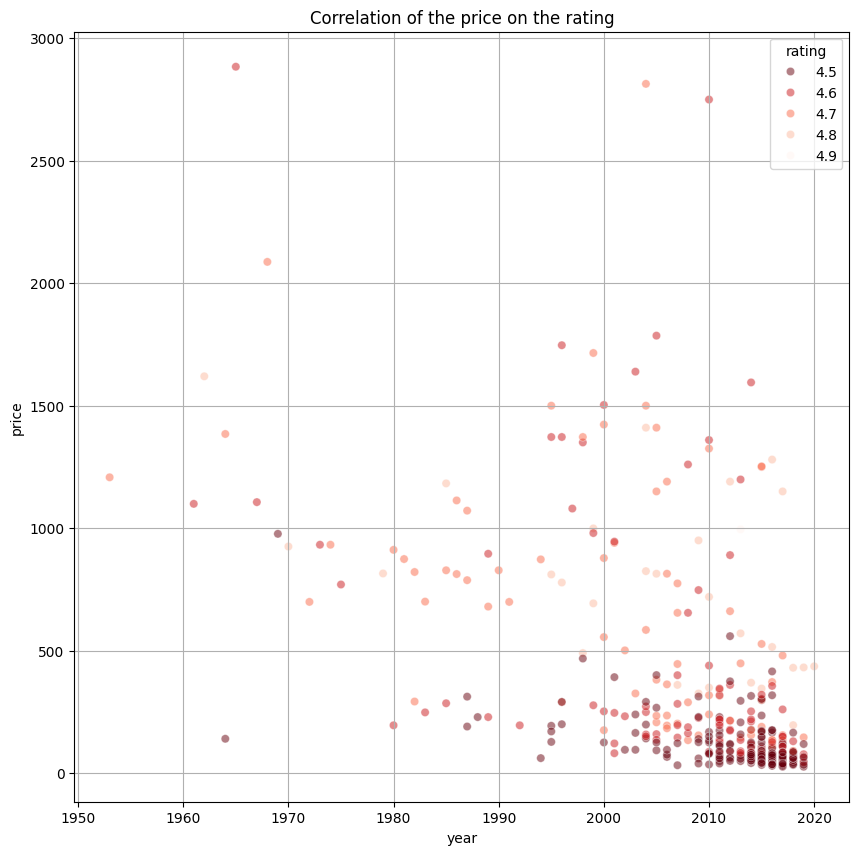

In [37]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=dfrr, x="year", y="price", hue ="rating", palette="Reds_r", sizes = (20, 20), alpha=0.5)
plt.grid(axis = "x")
plt.grid(axis = "y")
plt.title("Correlation of the price on the rating")
plt.show()

So, the first part of my hypothesis is true, because there are a lot of points in the period from 2000 to 2020 and a little amount of them before 2000. But, as it can be seen, price has no connection with the year.

# Data transformation

## I have to add two more columns

I want to put the "price" column in the last place

In [38]:
df = df[['winery', 'wine', 'year', 'rating', 'num_reviews', 'region', 'type', 'body', 'acidity', 'price']]

The first column

In [39]:
df['rounded price €'] = (df['price'].round(0))
df

,winery,wine,year,rating,num_reviews,region,type,body,acidity,price,rounded price €
0,Teso La Monja,Tinto,2013,4.9,58.0,Toro,Toro Red,5.0,3.0,995.00,995.0
1,Artadi,Vina El Pison,2018,4.9,31.0,Vino de Espana,Tempranillo,4.0,2.0,313.50,314.0
2,Vega Sicilia,Unico,2009,4.8,1793.0,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,324.95,325.0
3,Vega Sicilia,Unico,1999,4.8,1705.0,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,692.96,693.0
4,Vega Sicilia,Unico,1996,4.8,1309.0,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,778.06,778.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392.0,Rioja,Rioja Red,4.0,3.0,19.98,20.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390.0,Priorato,Priorat Red,4.0,3.0,16.76,17.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390.0,El Terrerazo,Red,4.0,3.0,24.45,24.0
7498,Matarromera,Gran Reserva,2011,4.2,389.0,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,64.50,64.0


The second column

Это курс на 08.12.23

In [40]:
df['price ₽'] = df['price'].apply(lambda x: x*97.71)
df

,winery,wine,year,rating,num_reviews,region,type,body,acidity,price,rounded price €,price ₽
0,Teso La Monja,Tinto,2013,4.9,58.0,Toro,Toro Red,5.0,3.0,995.00,995.0,97221.4500
1,Artadi,Vina El Pison,2018,4.9,31.0,Vino de Espana,Tempranillo,4.0,2.0,313.50,314.0,30632.0850
2,Vega Sicilia,Unico,2009,4.8,1793.0,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,324.95,325.0,31750.8645
3,Vega Sicilia,Unico,1999,4.8,1705.0,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,692.96,693.0,67709.1216
4,Vega Sicilia,Unico,1996,4.8,1309.0,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,778.06,778.0,76024.2426
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392.0,Rioja,Rioja Red,4.0,3.0,19.98,20.0,1952.2458
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390.0,Priorato,Priorat Red,4.0,3.0,16.76,17.0,1637.6196
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390.0,El Terrerazo,Red,4.0,3.0,24.45,24.0,2389.0095
7498,Matarromera,Gran Reserva,2011,4.2,389.0,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,64.50,64.0,6302.2950


The third column

In [42]:
df['rounded price ₽'] = (df['price ₽'].round(0))
df

,winery,wine,year,rating,num_reviews,region,type,body,acidity,price,rounded price €,price ₽,rounded price ₽
0,Teso La Monja,Tinto,2013,4.9,58.0,Toro,Toro Red,5.0,3.0,995.00,995.0,97221.4500,97221.0
1,Artadi,Vina El Pison,2018,4.9,31.0,Vino de Espana,Tempranillo,4.0,2.0,313.50,314.0,30632.0850,30632.0
2,Vega Sicilia,Unico,2009,4.8,1793.0,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,324.95,325.0,31750.8645,31751.0
3,Vega Sicilia,Unico,1999,4.8,1705.0,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,692.96,693.0,67709.1216,67709.0
4,Vega Sicilia,Unico,1996,4.8,1309.0,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,778.06,778.0,76024.2426,76024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392.0,Rioja,Rioja Red,4.0,3.0,19.98,20.0,1952.2458,1952.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390.0,Priorato,Priorat Red,4.0,3.0,16.76,17.0,1637.6196,1638.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390.0,El Terrerazo,Red,4.0,3.0,24.45,24.0,2389.0095,2389.0
7498,Matarromera,Gran Reserva,2011,4.2,389.0,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,64.50,64.0,6302.2950,6302.0
